# Importando base de dados e renomeando



In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dados = pd.read_csv('tips.csv')
dados.head(5)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [3]:
gorjeta = dados.rename(columns={'total_bill' : 'valor_da_conta', 'tip':'gorjeta','dessert':'sobremesa','day':'dia_da_semana','time':'hora_do_dia',
                      'size':'total_de_pessoas'})

In [4]:
gorjeta['hora_do_dia'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [5]:
gorjeta = gorjeta.replace(['No','Yes'], ['Não','Sim'])
gorjeta = gorjeta.replace(['Sun','Thur','Fri','Sat'], ['Domingo','Quinta','Sexta','Sábado'])
gorjeta = gorjeta.replace(['Dinner','Lunch'],['Jantar','Almoço'])
gorjeta

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


In [6]:
gorjeta['hora_do_dia'].unique()

array(['Jantar', 'Almoço'], dtype=object)

# Análise 1 - Valor da conta e gorjeta

In [7]:
gorjeta.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

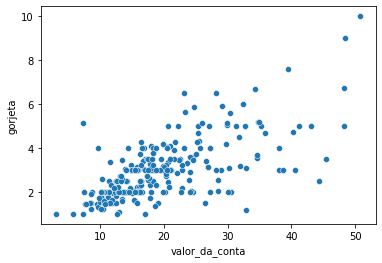

In [8]:
sns.scatterplot(x='valor_da_conta',y='gorjeta', data=gorjeta)

In [9]:
print('A base de dados contém {} registros'. format(gorjeta.shape[0]))
print('Registros não nulos')
gorjeta.count()

A base de dados contém 244 registros
Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [10]:
gorjeta['porcentagem'] = (gorjeta.gorjeta / gorjeta['valor_da_conta'] * 100).round(2)
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


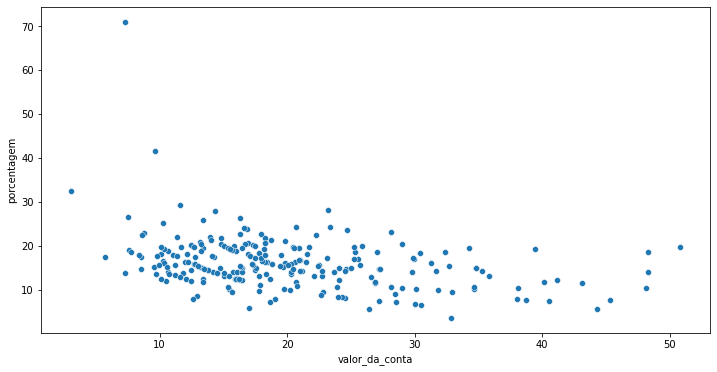

In [11]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjeta)
porcentagem_conta.get_figure()
porcentagem_conta.figure.set_size_inches(12,6)

**Visualmente o valor da conta não aumenta conforme a porcentagem de gorjeta, ou seja, as maiores porcentagens estão entre os menores valores de conta**

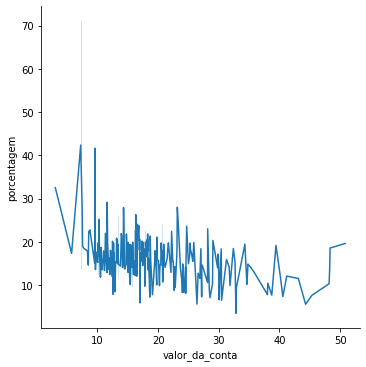

In [12]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta',y='porcentagem', kind='line', data=gorjeta)

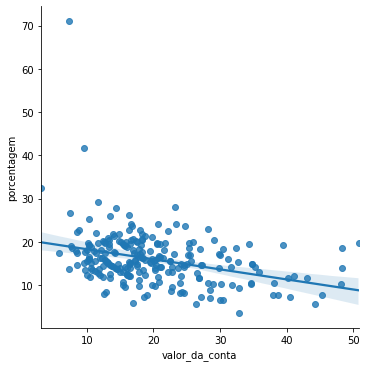

In [13]:
sns.lmplot(x='valor_da_conta',y='porcentagem',data=gorjeta)

# Análise 2 - Sobremesa

In [14]:
gorjeta.query("sobremesa == 'Sim'").describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319140
std,9.832154,1.401468,0.810751,8.511748
min,3.070000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,10.680000
50%,17.920000,3.000000,2.000000,15.380000
75%,26.860000,3.680000,3.000000,19.510000
max,50.810000,10.000000,5.000000,71.030000


In [15]:
gorjeta.query("sobremesa == 'Não'").describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932318
std,8.255582,1.377190,1.017984,3.990701
min,7.250000,1.000000,1.000000,5.680000
25%,13.325000,2.000000,2.000000,13.690000
50%,17.590000,2.740000,2.000000,15.560000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.200000


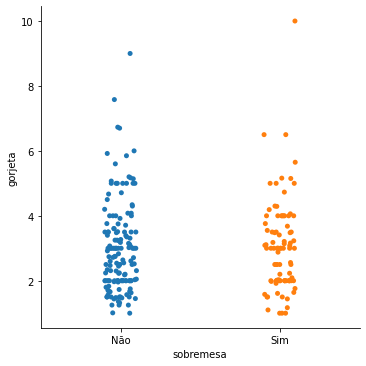

In [16]:
sns.catplot(x='sobremesa',y='gorjeta',data=gorjeta)

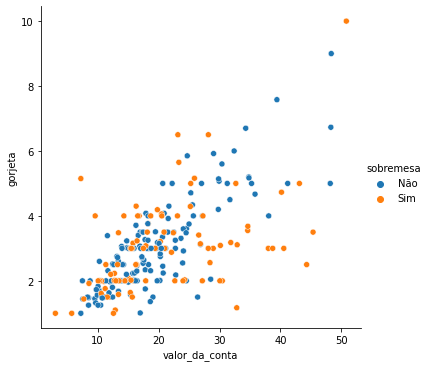

In [17]:
sns.relplot(x='valor_da_conta',y='gorjeta',data=gorjeta,hue='sobremesa')

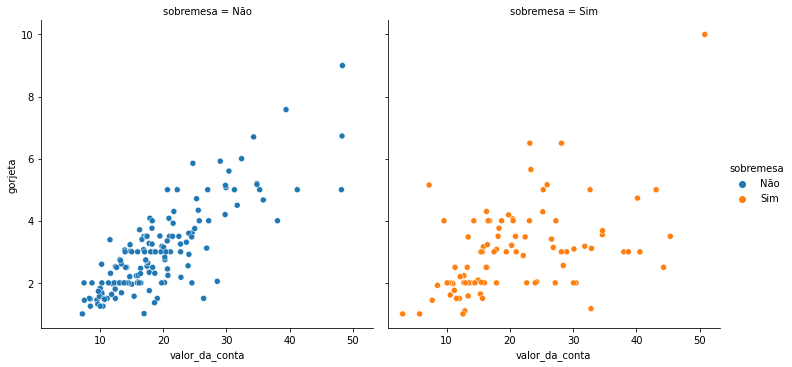

In [18]:
sns.relplot(x='valor_da_conta',y='gorjeta',data=gorjeta,col='sobremesa',hue='sobremesa')

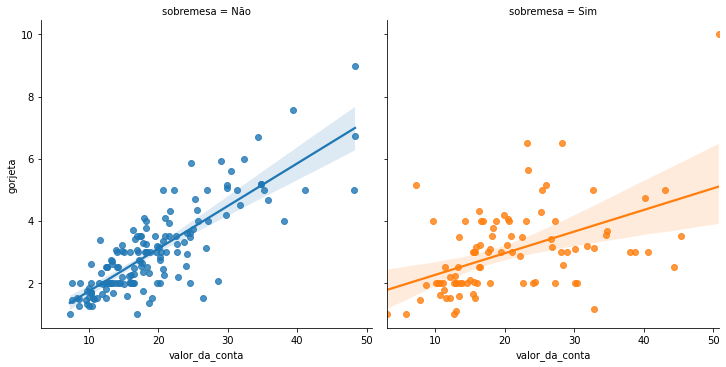

In [19]:
sns.lmplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',data=gorjeta, col='sobremesa')

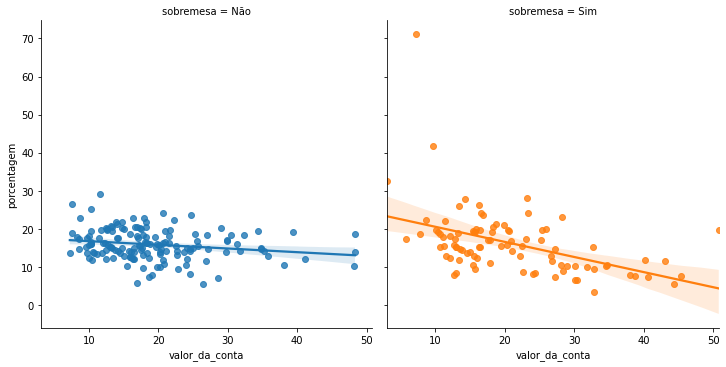

In [20]:
sns.lmplot(x='valor_da_conta',y='porcentagem',hue='sobremesa',data=gorjeta,col='sobremesa')

Visualmente existe uma diferença na gorjeta entre os que pediram sobremesa e os que não pediram. Enquanto os que não pediram seguiram mais ou menos o mesmo padrão de comportamento observado anteriormente (valor da gorjeta sobe conforme sobe o valor da conta, mas não proporcionalmente), os que pediram apresentam uma tendência de queda na gorjeta. Portanto, quanto mais cara for a conta e se tiver pedido sobremesa, meenor a porcentagem de gorjeta.

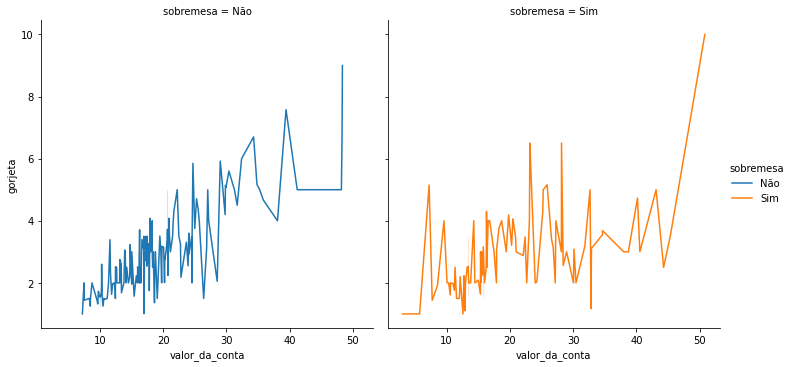

In [21]:
sns.relplot(x='valor_da_conta',y='gorjeta',data=gorjeta,col='sobremesa',hue='sobremesa', kind='line')

## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [22]:
from scipy.stats import ranksums

In [23]:
sobremesa = gorjeta.query("sobremesa == 'Sim'").porcentagem

In [24]:
sem_sobremesa = gorjeta.query("sobremesa == 'Não'").porcentagem

In [25]:
display(sobremesa, sem_sobremesa)

56      7.89
58     15.66
60     15.82
61     14.48
62     17.97
       ...  
234    19.32
236     7.94
237     3.56
240     7.36
241     8.82
Name: porcentagem, Length: 93, dtype: float64

0       5.94
1      16.05
2      16.66
3      13.98
4      14.68
       ...  
235    12.41
238    13.03
239    20.39
242     9.82
243    15.97
Name: porcentagem, Length: 151, dtype: float64

In [26]:
ranksums(sobremesa,sem_sobremesa)

RanksumsResult(statistic=-0.5845504113520769, pvalue=0.558850059321255)

In [27]:
print('O valor do p-value é {}'.format(ranksums(sobremesa,sem_sobremesa)[1]))

O valor do p-value é 0.558850059321255


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da semana

In [28]:
gorjeta['dia_da_semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

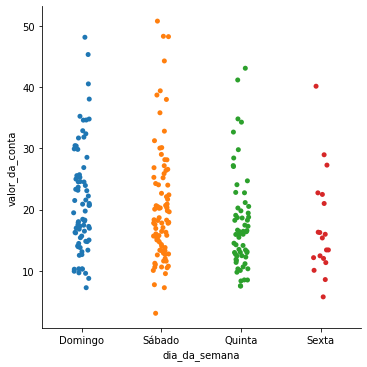

In [29]:
sns.catplot(x='dia_da_semana',y='valor_da_conta',data=gorjeta)

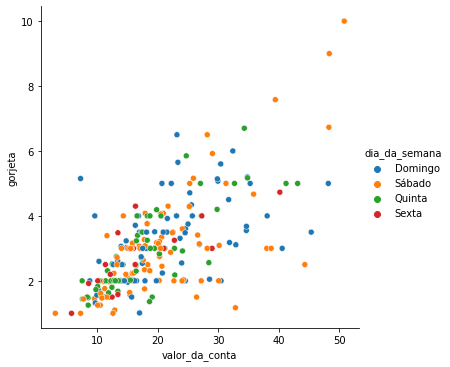

In [30]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',data=gorjeta)

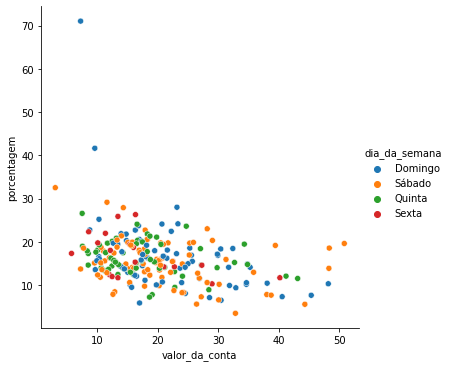

In [31]:
sns.relplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',data=gorjeta)

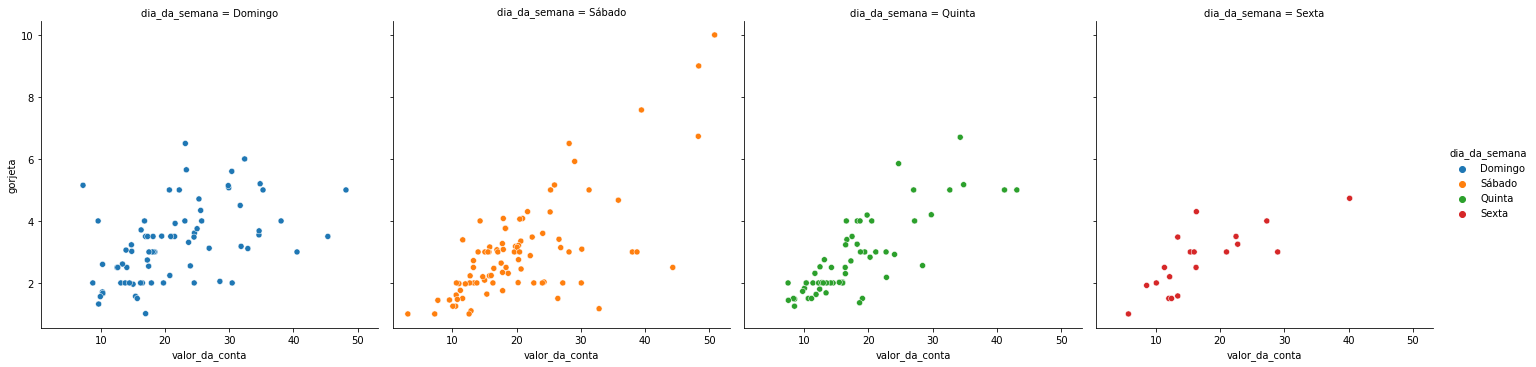

In [32]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',data=gorjeta, col='dia_da_semana')

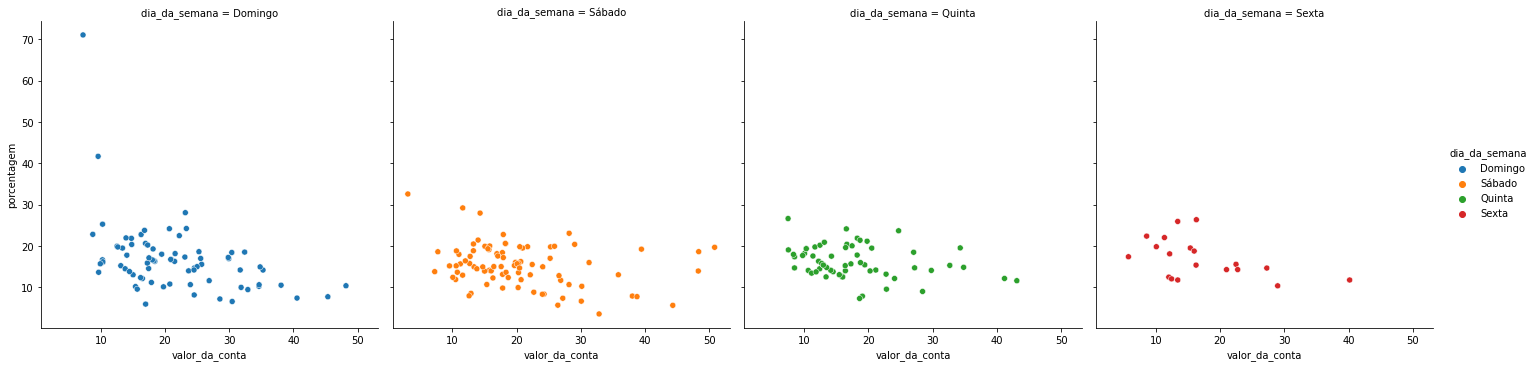

In [33]:
sns.relplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',data=gorjeta, col='dia_da_semana')

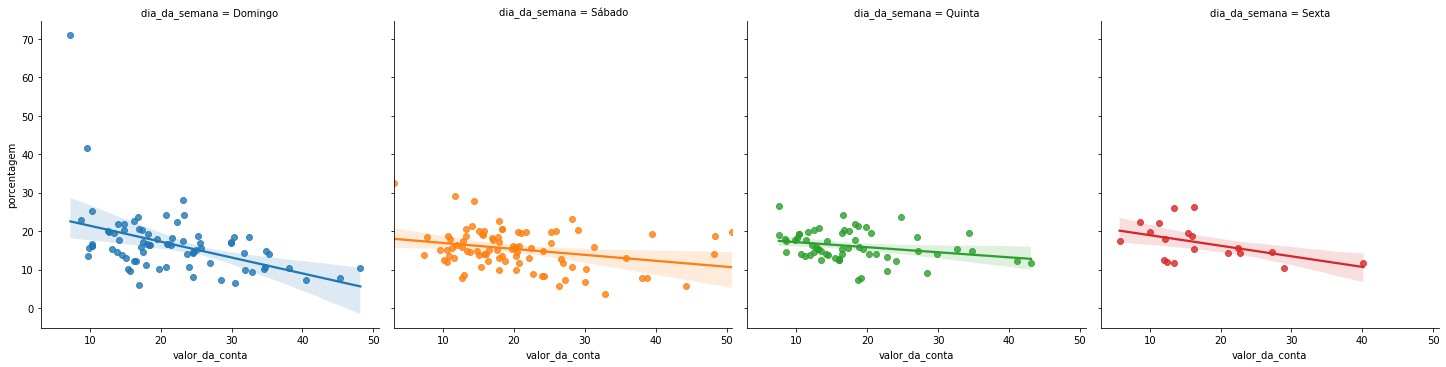

In [34]:
sns.lmplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',data=gorjeta, col='dia_da_semana')

In [35]:
media_geral_gorjetas = gorjeta.gorjeta.mean()
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [36]:
gorjeta.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,16.689605
Quinta,17.682742,2.771452,16.126452
Sexta,17.151579,2.734737,16.991579
Sábado,20.441379,2.993103,15.314598


In [37]:
gorjeta.groupby(['dia_da_semana']).describe()

valor_da_conta                       ... porcentagem                
                       count       mean       std  ...         50%      75%    max
dia_da_semana                                      ...                            
Domingo                 76.0  21.410000  8.832122  ...       16.11  18.7850  71.03
Quinta                  62.0  17.682742  7.886170  ...       15.38  19.2675  26.63
Sexta                   19.0  17.151579  8.302660  ...       15.56  19.6650  26.35
Sábado                  87.0  20.441379  9.480419  ...       15.18  18.8250  32.57

[4 rows x 32 columns]

In [38]:
print('Frequência dos dias')
gorjeta.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [39]:
valor_conta_domingo = gorjeta.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_sabado = gorjeta.query("dia_da_semana == 'Sábado'").valor_da_conta
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

Com p-value de 0.35, não rejeitamos a hipótese nula, portanto a distribuição do valor da conta é igual no sábado e no domingo.

# Análise 4 - Hora do dia

In [40]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [42]:
gorjeta.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

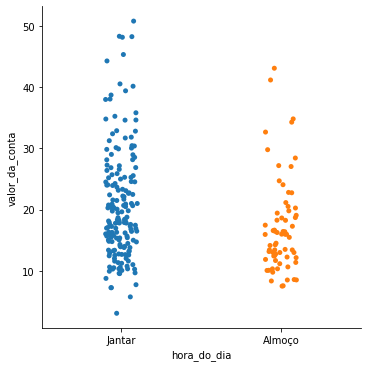

In [43]:
sns.catplot(x='hora_do_dia',y='valor_da_conta',data=gorjeta)

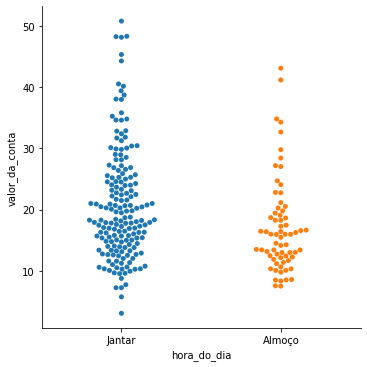

In [44]:
sns.catplot(x='hora_do_dia',y='valor_da_conta',data=gorjeta, kind='swarm')

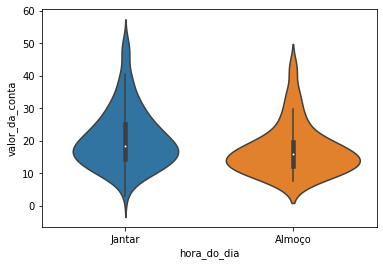

In [46]:
sns.violinplot(x='hora_do_dia',y='valor_da_conta',data=gorjeta)

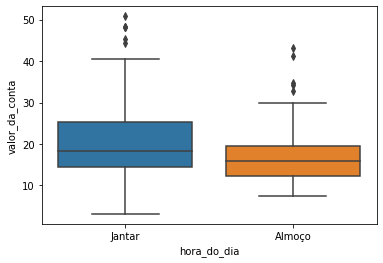

In [50]:
sns.boxplot(x='hora_do_dia',y='valor_da_conta',data=gorjeta)

In [52]:
almoco = gorjeta.query("hora_do_dia=='Almoço'").valor_da_conta

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


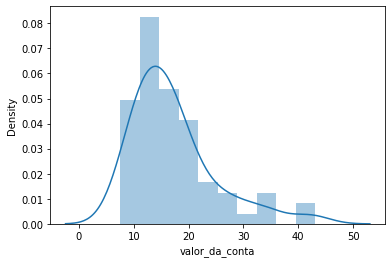

In [53]:
sns.distplot(almoco)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


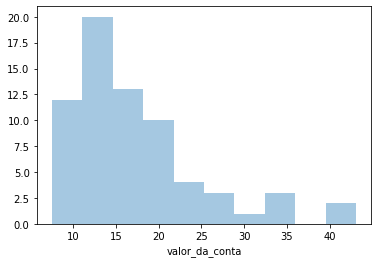

In [55]:
sns.distplot(almoco,kde=False)

In [57]:
jantar = gorjeta.query("hora_do_dia=='Jantar'").valor_da_conta

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


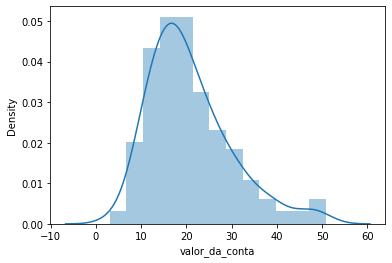

In [58]:
sns.distplot(jantar)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


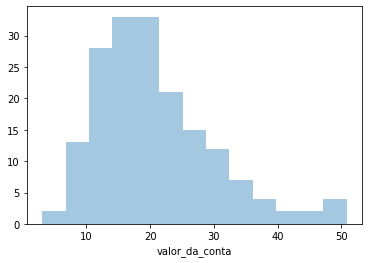

In [59]:
sns.distplot(jantar,kde=False)

In [65]:
gorjeta.groupby(['hora_do_dia']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,16.411765
Jantar,20.797159,3.102670,15.951477


## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no jantar e no almoçoo**

In [67]:
r2 = ranksums(jantar, almoco)
r2

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

In [69]:
print('O valor do p-value é de {}'.format(r2[1]))

O valor do p-value é de 0.0011791039723641672


Com p-value de 0.001, rejeitamos a hipótese nula e mantemos a hipótese alternativa:


> *A distribuição do valor da conta não é igual no jantar e no almoçoo*

## Teste de hipótese 2

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é igual no jantar e no almoçoo**

In [70]:
porcentagem_almoco = gorjeta.query("hora_do_dia == 'Almoço'").porcentagem

In [71]:
porcentagem_jantar = gorjeta.query("hora_do_dia=='Jantar'").porcentagem

In [72]:
ranksums(porcentagem_almoco,porcentagem_jantar)

RanksumsResult(statistic=1.204699018193021, pvalue=0.22831951519679017)

Com p-value de 0.22 não rejeitamos a hipótese nula: 

*A distribuição da taxa da gorjeta é igual no jantar e no almoço*